# W14 - Exercise

use the dataset __heart.csv__ for this exercise

About this dataset <br>
- Age : Age of the patient <br>
- Sex : Sex of the patient <br>
- exang: exercise induced angina (1 = yes; 0 = no) <br>
- ca: number of major vessels (0-3) <br>
- cp : Chest Pain type chest pain type <br>
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg) <br>
- chol : cholestoral in mg/dl fetched via BMI sensor<br>
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
- rest_ecg : resting electrocardiographic results <br>
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved <br>
- target : 0= less chance of heart attack 1= more chance of heart attack <br>

In [2]:
!pip install xgboost

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preparation / Cleaning 

In [37]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [38]:
df.duplicated().sum()

1

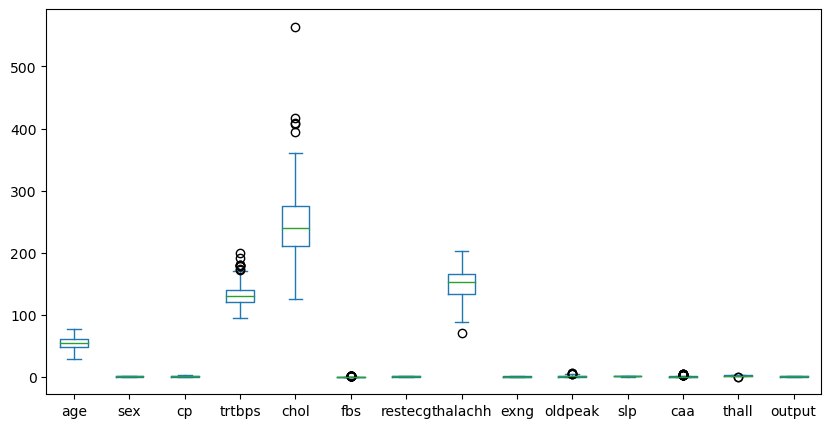

In [39]:
df.plot(kind='box', figsize=(10, 5))
plt.show()

In [40]:
df = df.drop_duplicates()

In [41]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [42]:
print("\nCleaned dataset:")
df.head()


Cleaned dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
print("\nMissing values after cleaning:")
df.isnull().sum()


Missing values after cleaning:


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

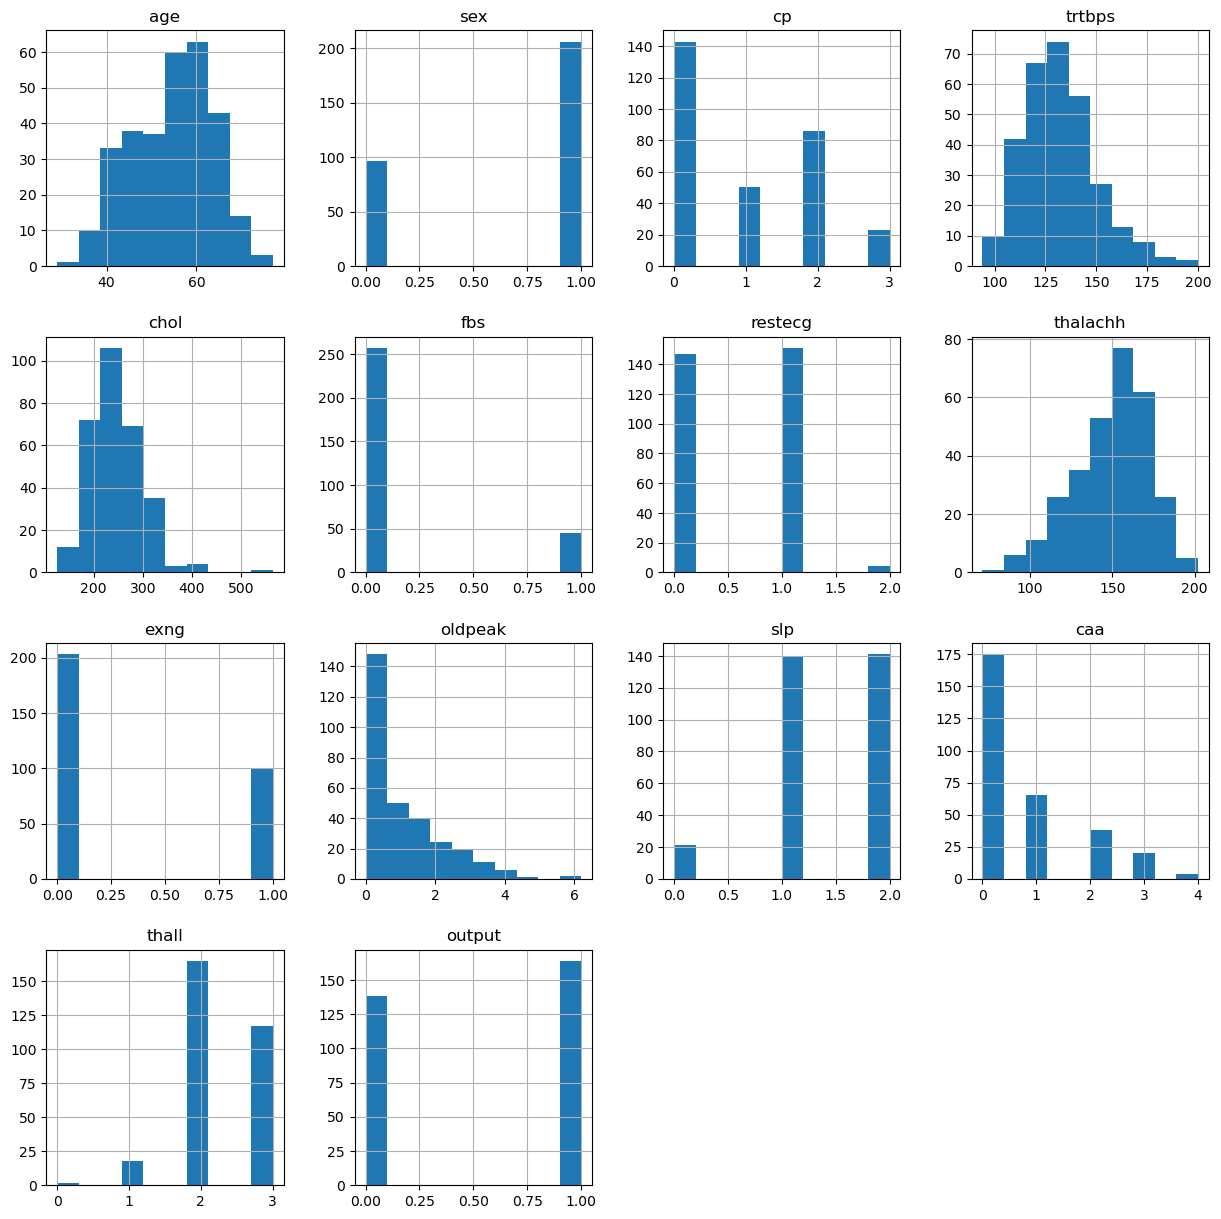

In [56]:
df.hist(figsize=(15,15))
plt.show()

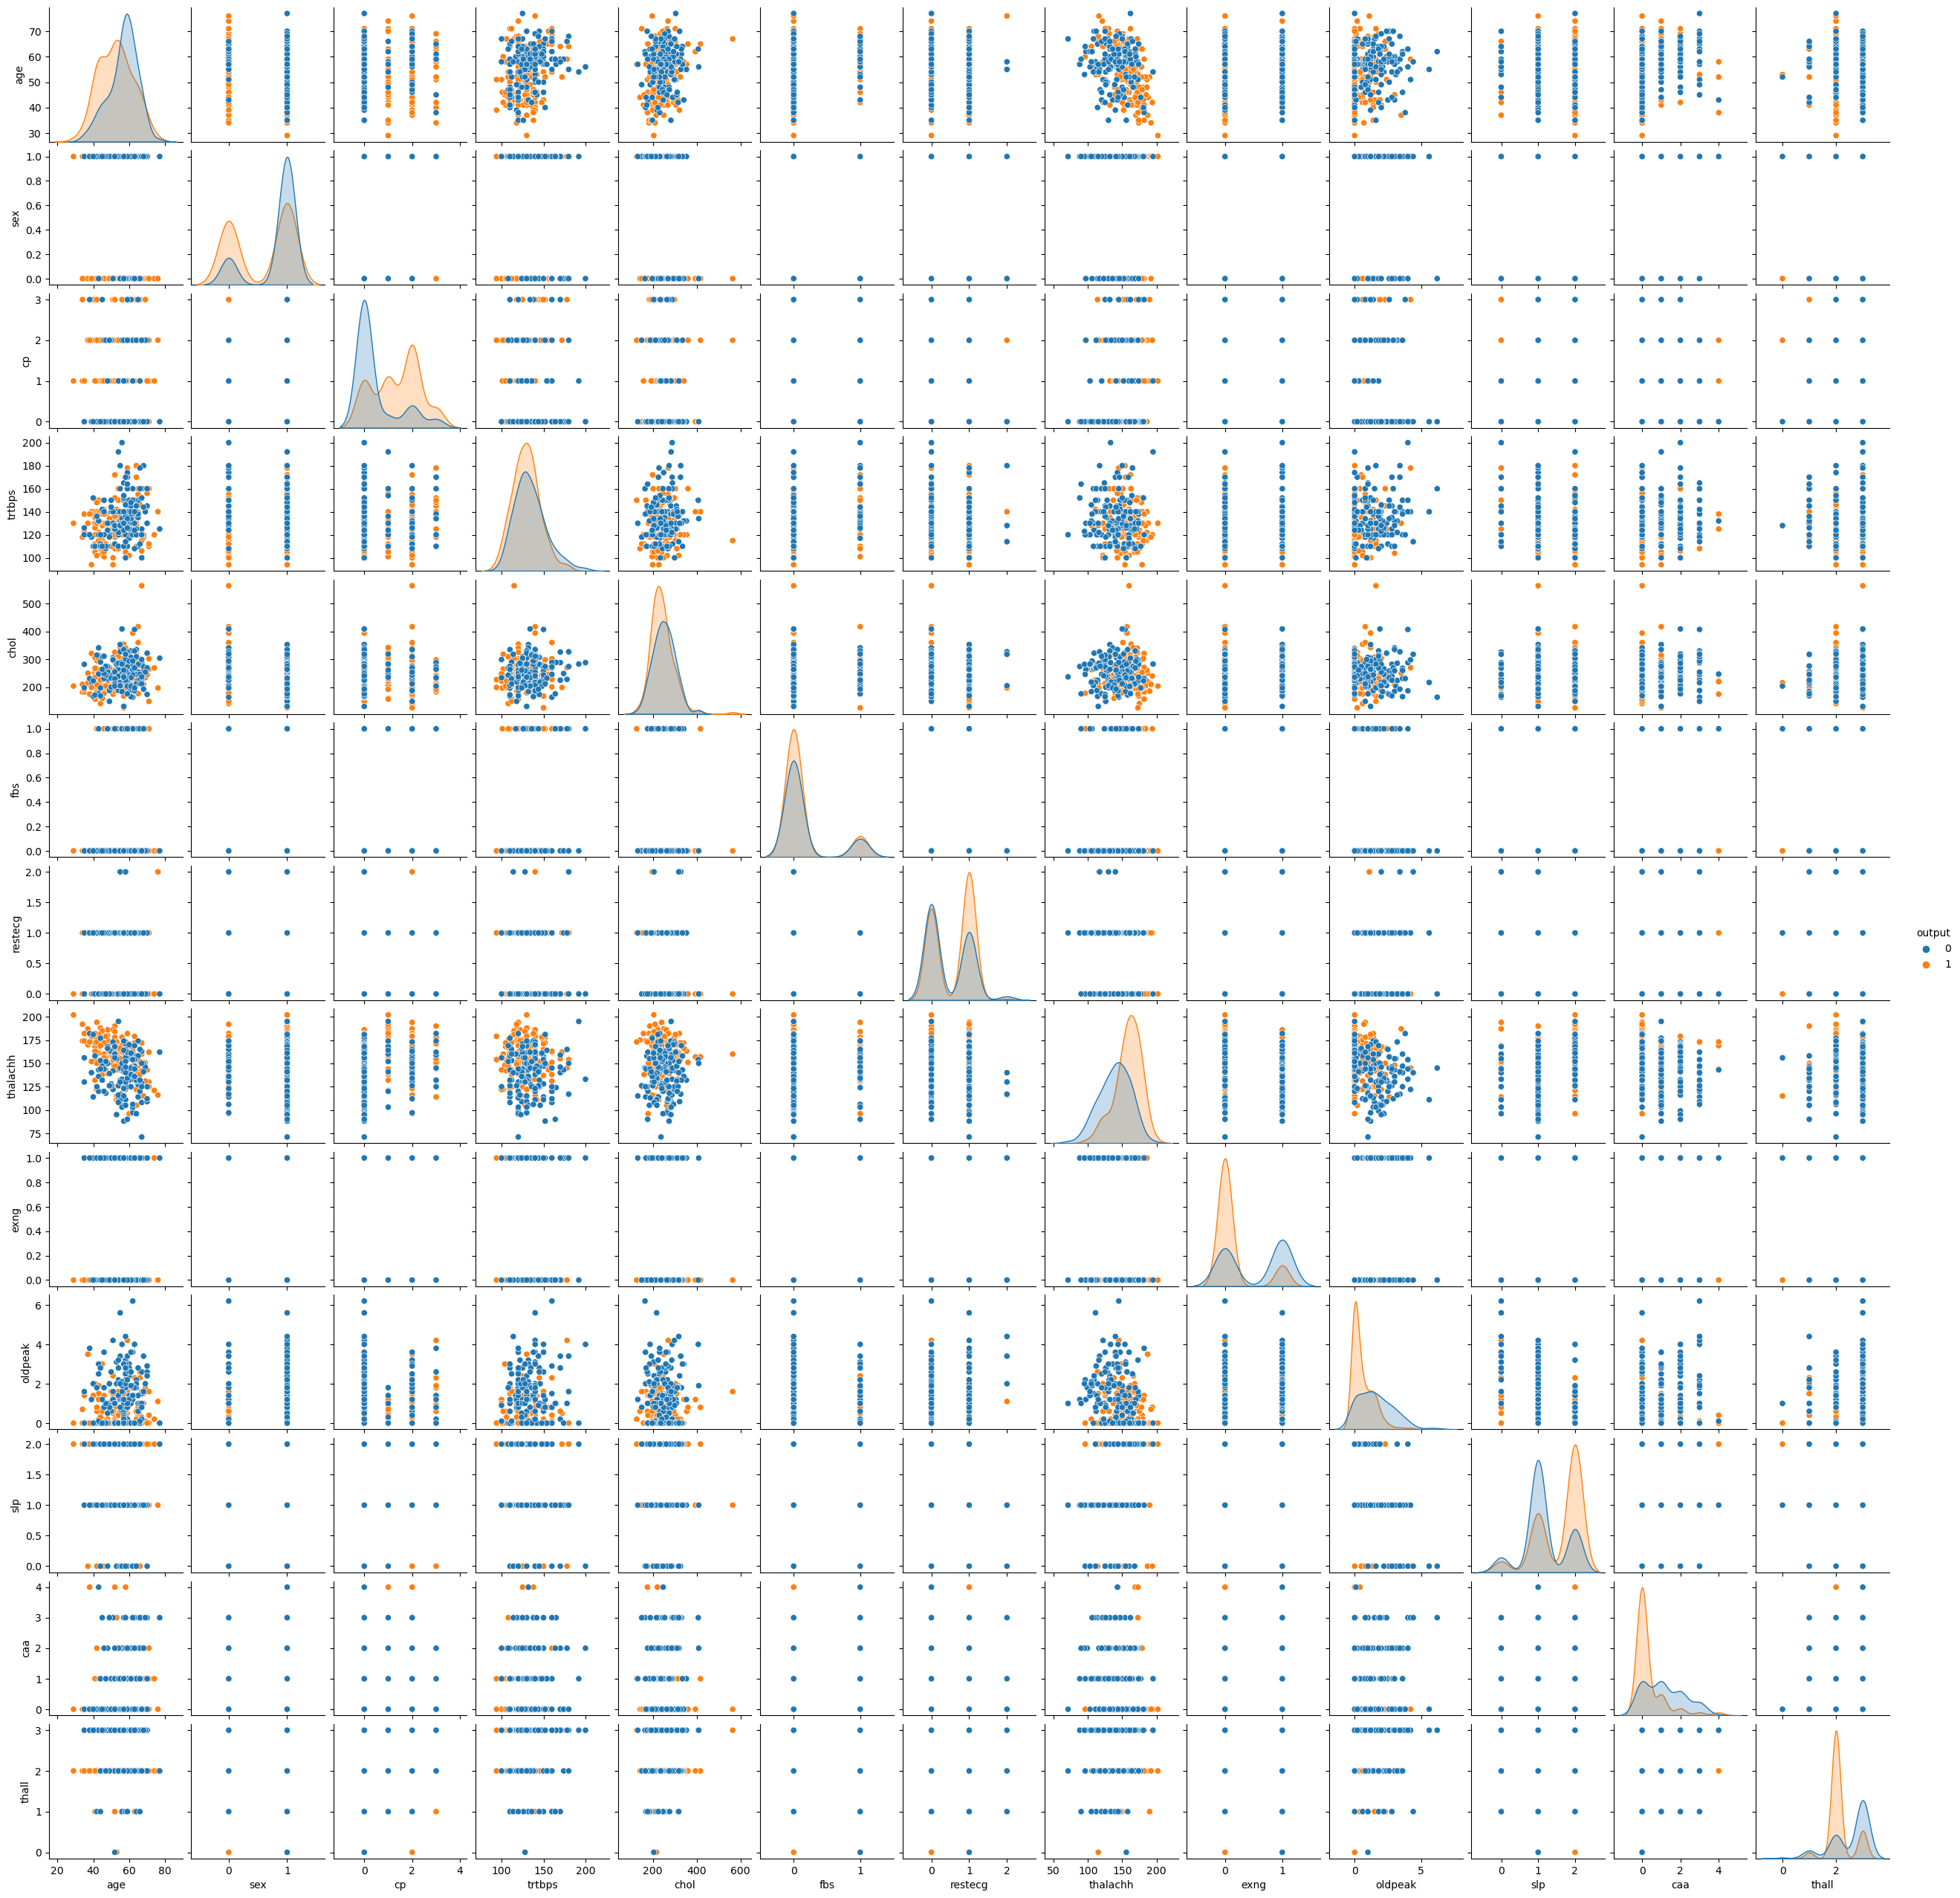

In [55]:
sns.pairplot(df, hue='output', height=2)
plt.show()

<AxesSubplot:>

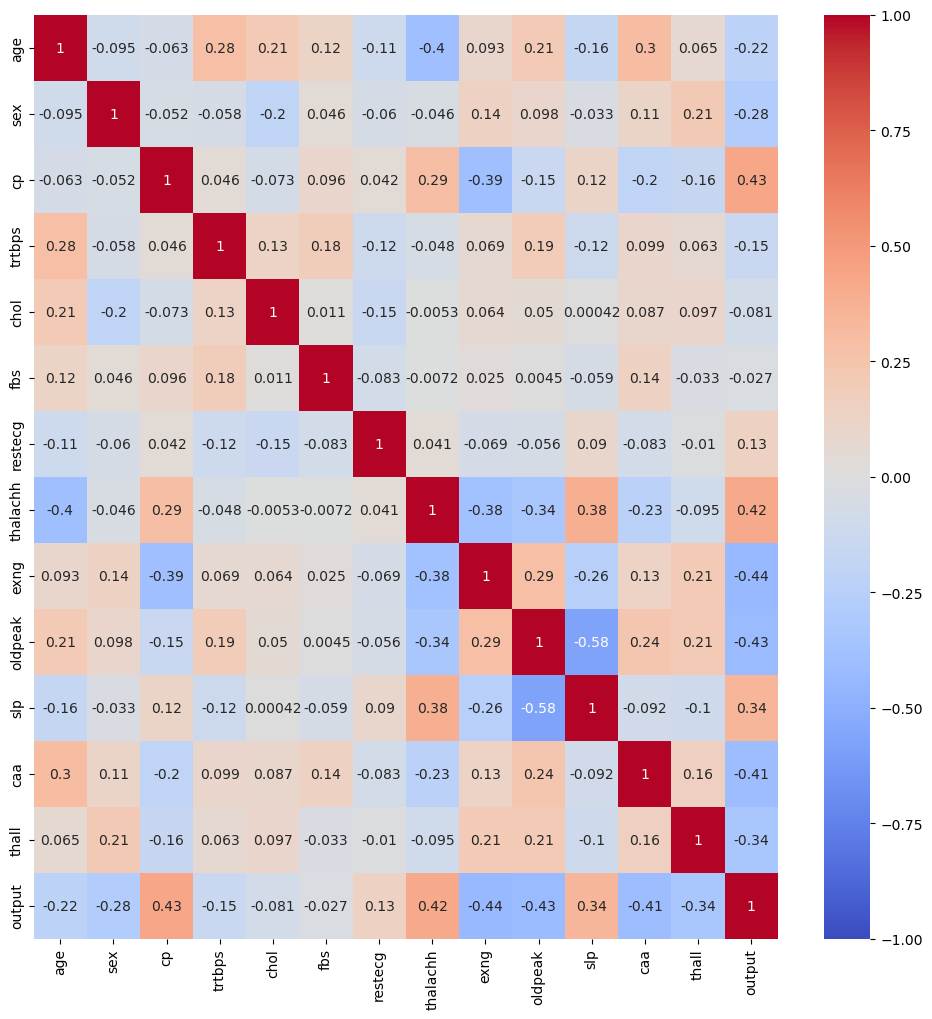

In [53]:
corr_matrix=df.corr()
plt.figure(1, figsize=(12,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, vmin=-1, vmax=1)

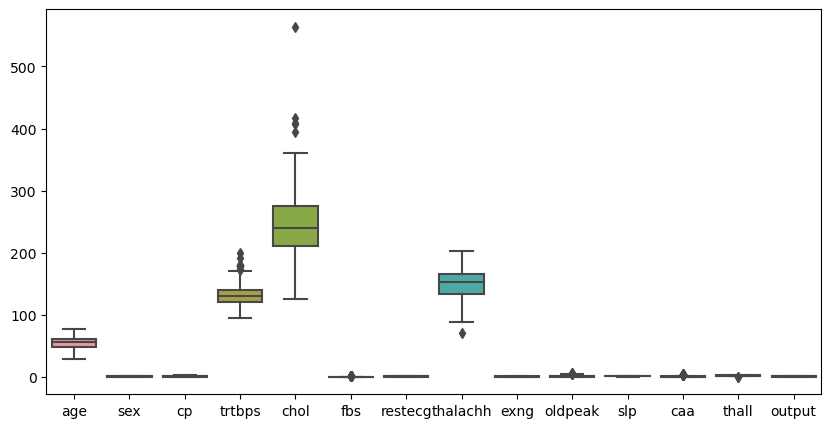

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.show()

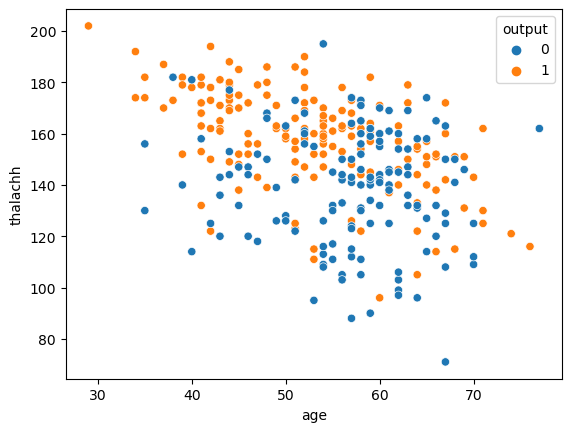

In [81]:
sns.scatterplot(x='age', y='thalachh', hue='output', data=df)
plt.show()

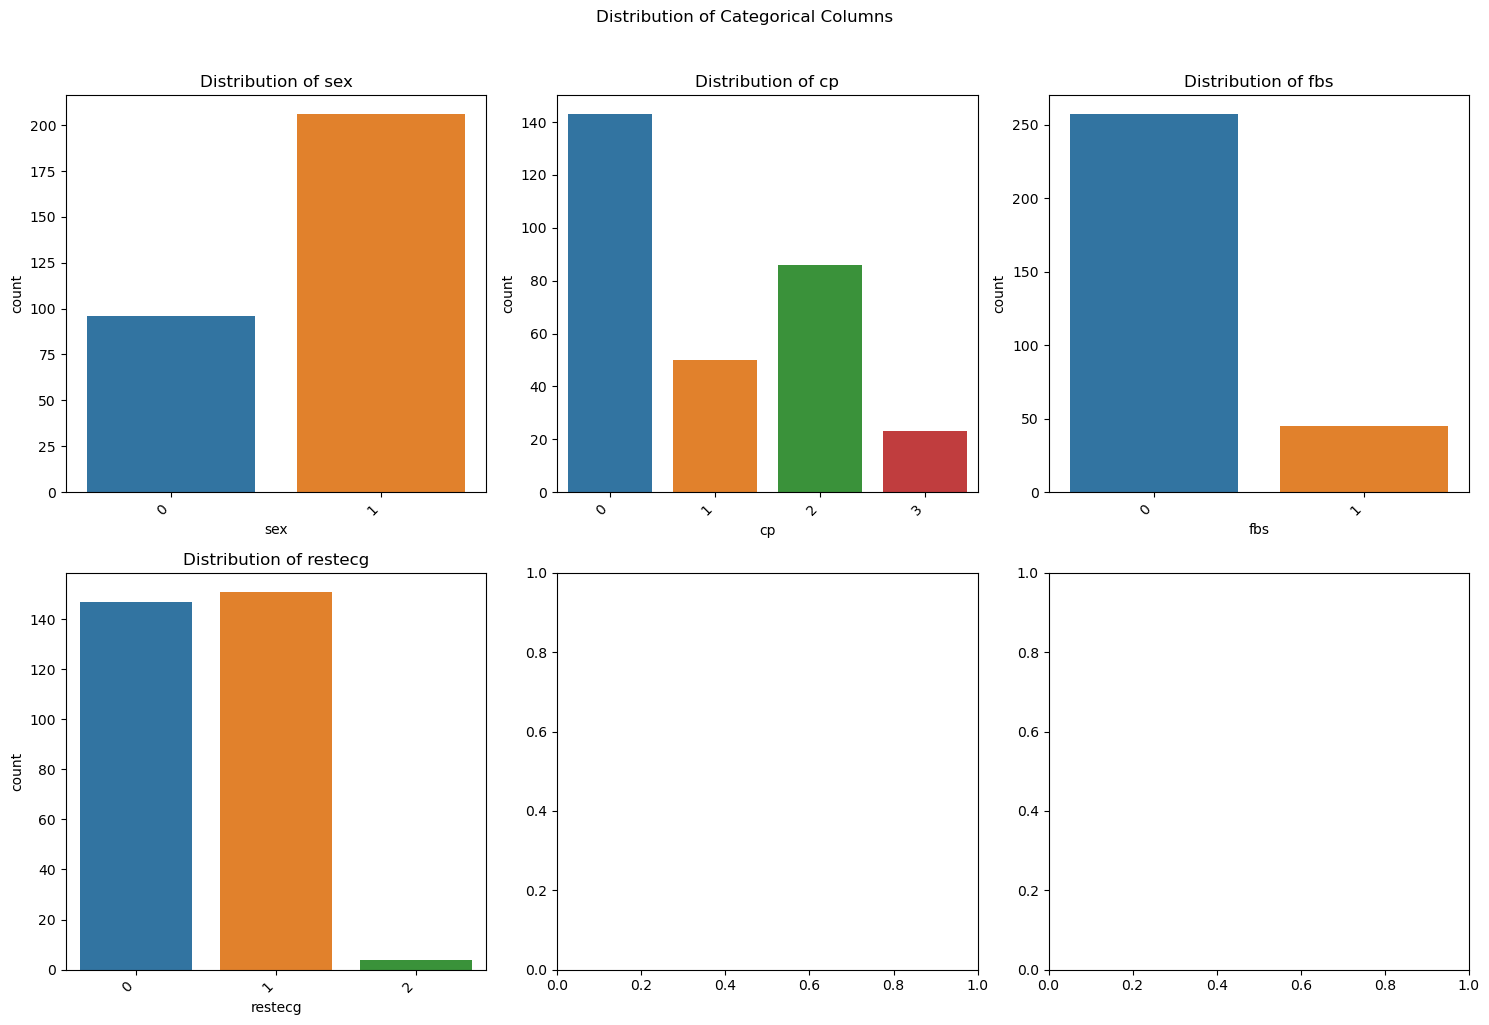

In [60]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Columns', y=1.02)

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# Compare two different variables and provide short analysis 

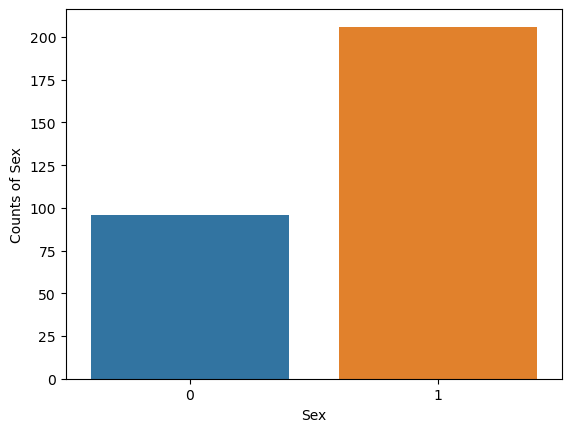

In [63]:
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Counts of Sex')
plt.show()

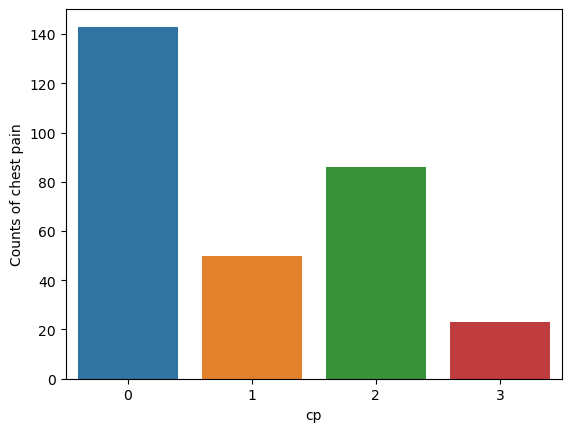

In [89]:
sns.countplot(x='cp', data=df)
plt.xlabel('cp')
plt.ylabel('Counts of chest pain')
plt.show()

1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
2. It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest.
3. It can also be observed people have chest pain of type 0 is almost 50% of all the people

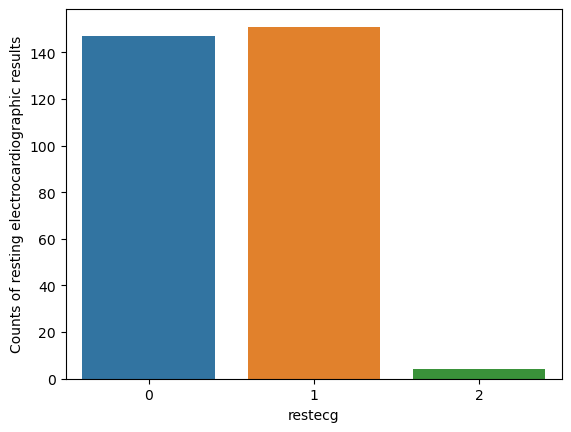

In [107]:
sns.countplot(x='restecg', data=df)
plt.xlabel('restecg')
plt.ylabel('Counts of resting electrocardiographic results')
plt.show()

1. It can be observed people resting electrocardiographic results of value 0 i.e ' Normal' is the high.
2. It can be observed people resting electrocardiographic results of value 1 i.e ' having ST-T wave abnormality ' is the highest.
3. It can also be observed people resting electrocardiographic results of value 2 to showing probable or definite left ventricular hypertrophy by Estes' criteria is the lowest than value 0 and value 1

<Figure size 1000x1000 with 0 Axes>

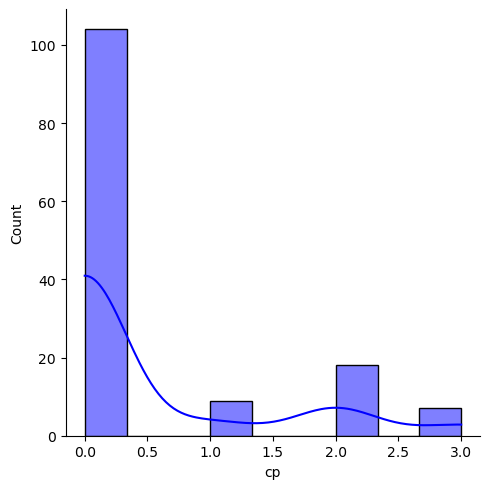

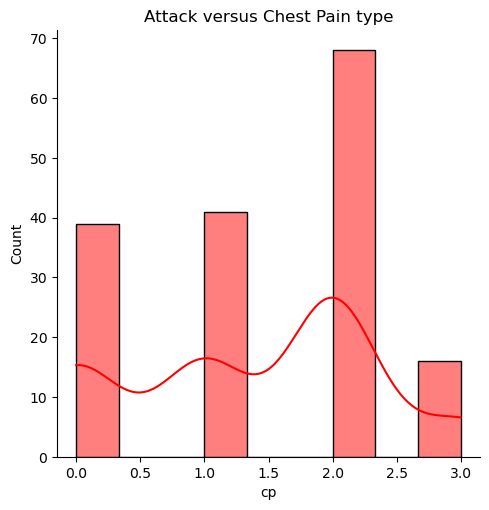

In [102]:
plt.figure(figsize=(10, 10))
sns.displot(df[df['output'] == 0]["cp"], color = 'blue', kde=True,)
sns.displot(df[df['output'] == 1]["cp"], color = 'red', kde=True,)
plt.title('Attack versus Chest Pain type')
plt.show()

<Figure size 1000x1000 with 0 Axes>

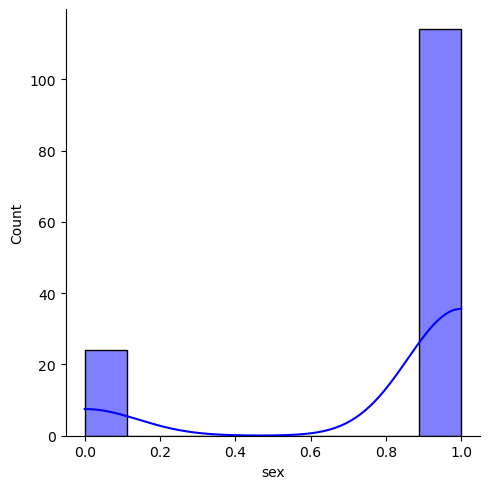

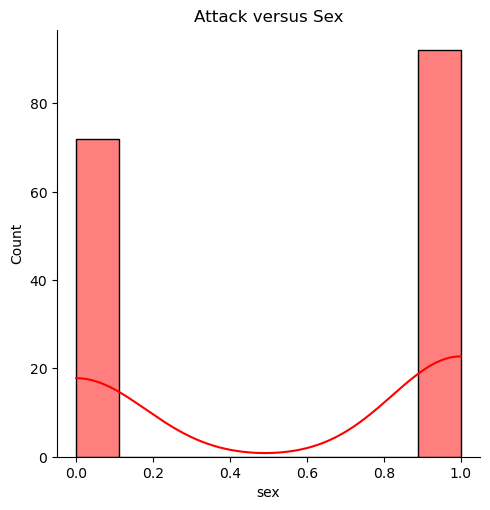

In [110]:
plt.figure(figsize=(10, 10))
sns.displot(df[df['output'] == 0]["sex"], color = 'blue', kde=True,)
sns.displot(df[df['output'] == 1]["sex"], color = 'red', kde=True,)
plt.title('Attack versus Sex')
plt.show()

<Figure size 1000x1000 with 0 Axes>

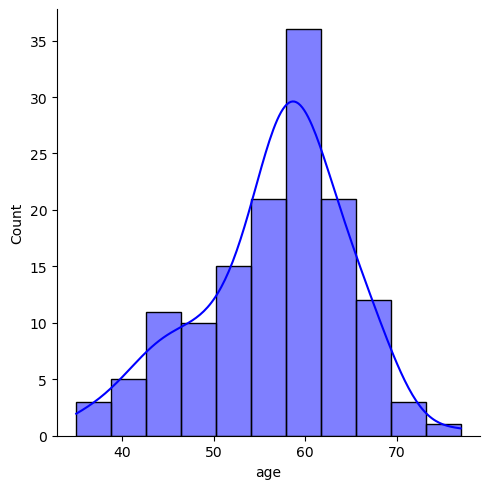

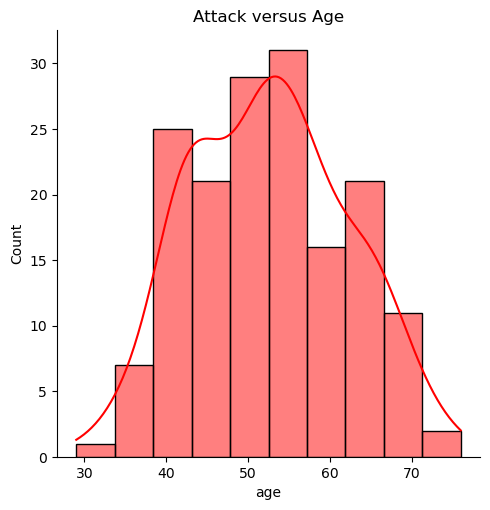

In [109]:
plt.figure(figsize=(10, 10))
sns.displot(df[df['output'] == 0]["age"], color = 'blue', kde=True,)
sns.displot(df[df['output'] == 1]["age"], color = 'red', kde=True,)
plt.title('Attack versus Age')
plt.show()

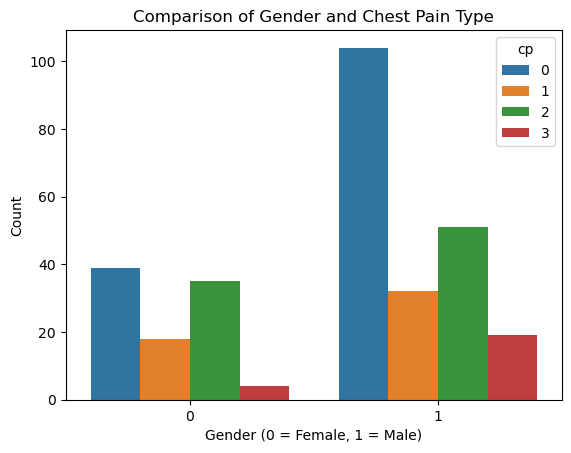

In [61]:
sns.countplot(x='sex', hue='cp', data=df)
plt.title('Comparison of Gender and Chest Pain Type')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

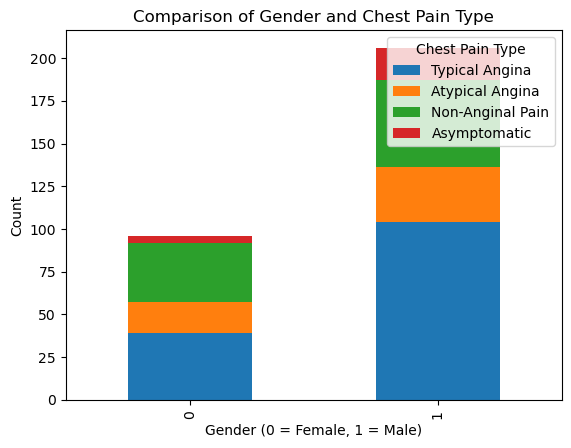

In [62]:
cross_tab = pd.crosstab(df['sex'], df['cp'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Comparison of Gender and Chest Pain Type')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()

In [92]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Create model for analysis (Classification)

1. XGBoost

In [76]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy XGBoost: {accuracy}')

Accuracy XGBoost: 0.8360655737704918


2. KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean", p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [79]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy KNN Classifier: {accuracy}')

Accuracy KNN Classifier: 0.6557377049180327


3. Logistic Regression

In [64]:
X = df.drop(['output'], axis = 1)
Y = df['output']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_transformed = scaler.transform(X)
scaler_transformed

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression: {accuracy}')

Accuracy Logistic Regression: 0.8524590163934426


In [80]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy Gaussian Naive Bayes: {accuracy_gnb}')

Accuracy Gaussian Naive Bayes: 0.8852459016393442


In [84]:
models = {
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

K-Nearest Neighbor Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.65      0.75      0.70        32

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61

Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Gaussian Naive Bayes Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Short Conclusion About the Modeling Results

1. XGBoost:
Accuracy: 83.61%
XGBoost performed well in classifying heart disease based on the given features. The model achieved a good level of accuracy, indicating its effectiveness in capturing complex relationships in the data.

2. K-Nearest Neighbors (KNN):
Accuracy: 65.57%
KNN achieved a lower accuracy compared to XGBoost. This might suggest that the data's decision boundaries are not well-suited for a nearest neighbors approach or that feature scaling could be crucial for KNN's performance.

3. Logistic Regression:
Accuracy: 85.25%
Logistic Regression performed well, with an accuracy of 85.25%. However, it's important to note the convergence warning during training. Consider adjusting the number of iterations or scaling the data to potentially improve convergence.

In conclusion, Logistic Regression achieved the highest accuracy among the models tested, indicating its suitability for this classification task. However, it's recommended to further explore and optimize each model, considering hyperparameter tuning, feature engineering, and addressing convergence warnings, to improve overall model performance. Additionally, evaluating the models using other metrics such as precision, recall, and F1-score could provide a more comprehensive understanding of their strengths and weaknesses.